In [36]:
import numpy as np
from scipy.io import loadmat
jun=loadmat('june.mat')
dec=loadmat('december.mat')

In [37]:
jun.keys()

dict_keys(['__header__', '__version__', '__globals__', 'june'])

In [38]:
jun=jun['june']

In [39]:
dec.keys()

dict_keys(['__header__', '__version__', '__globals__', 'december'])

In [40]:
dec=dec['december']

In [41]:
jun

array([[1377,  974],
       [ 299, 1603],
       [ 376,  632],
       ...,
       [ 796, 1323],
       [ 943,  292],
       [1293,  123]], dtype=uint16)

In [42]:
dec

array([[1417,  974],
       [ 341, 1603],
       [ 418,  632],
       ...,
       [ 833, 1323],
       [ 991,  292],
       [1332,  123]], dtype=uint16)

In [43]:
disp=dec[:,0]-jun[:,0]

In [44]:
disp

array([40, 42, 42, ..., 37, 48, 39], dtype=uint16)

In [45]:
disp.astype('float64')

array([40., 42., 42., ..., 37., 48., 39.])

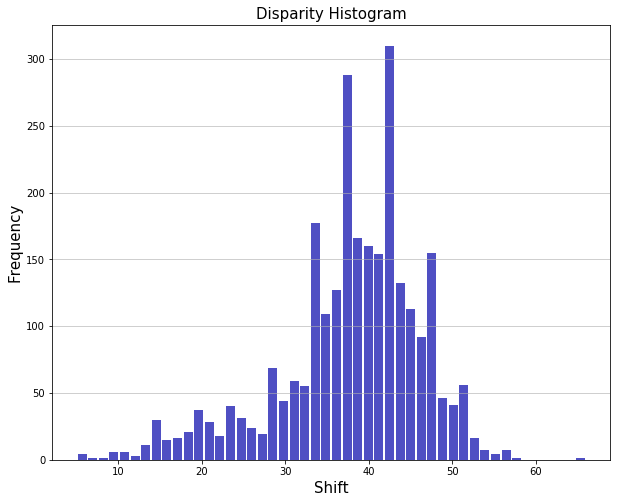

In [46]:
from matplotlib import pyplot as plt
def plot_histogram(dis_arr):
    plt.figure(figsize=[10,8])
    plt.hist(x=dis_arr, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85);
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Shift',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Disparity Histogram',fontsize=15)
    plt.show();
    
plot_histogram(disp)

Initial Centroids [35, 39]
Epoch 1 517.053435114503 16481.980698529173 [36.63358778625954, 38.162224264705884]
Epoch 2 6300.928176795582 5232.758364312275 [29.859116022099446, 43.25278810408922]
Epoch 3 5542.58044164035 5948.9468267581515 [28.845425867507885, 42.77015437392796]
Epoch 4 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]


C:\Users\Vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ushort_scalars
C:\Users\Vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in ushort_scalars


Epoch 5 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 6 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 7 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 8 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 9 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 10 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 11 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 12 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 13 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 14 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 15 4805.970873786402 6700.592750533017 [27.74271844660194, 42.31183368869936]
Epoch 16 4805.970873786402 6700.592750533017 [27.74271844660194, 42.3118336886993

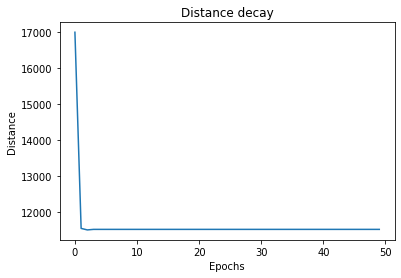

In [58]:
import random
def KMeans(data):
    
    #Intialize centroids
    #min_d=min(data)
    #max_d=max(data)
    #centroids=[(3*min_d+max_d)/4, (3*max_d+min_d)/4]
    centroids=random.sample(list(set(data)),2)
    print('Initial Centroids',centroids)
    
    
    
    dist=[]
    for i in range(50):
        #Cluster assignment
        clus1=[]
        clus2=[]
        for j in data:
            distance1=np.linalg.norm(j-centroids[0])
            distance2=np.linalg.norm(j-centroids[1])
            #print(distance1)
            #print(distance2)
            
            if distance1<distance2:
                clus1.append(j)
            else:
                clus2.append(j)
        
        #Update clusters
        centroids[0]=np.mean(clus1)
        centroids[1]=np.mean(clus2)
        
        
        dist1=sum([np.linalg.norm(k-centroids[0]) for k in clus1])
        dist2=sum([np.linalg.norm(l-centroids[1]) for l in clus2])
        print('Epoch',i+1,dist1,dist2,centroids)
        dist.append(dist1+dist2)
    
    plt.plot(dist)
    plt.title('Distance decay')
    plt.xlabel('Epochs')
    plt.ylabel('Distance')
        
    return (clus1,clus2,centroids)

result=KMeans(disp)
cluster1=result[0]
cluster2=result[1]
clus_centroids=result[2]

#print(cluster1)
#print(cluster2)
print(clus_centroids)

In [60]:
len(cluster1)

824

In [61]:
len(cluster2)

1876

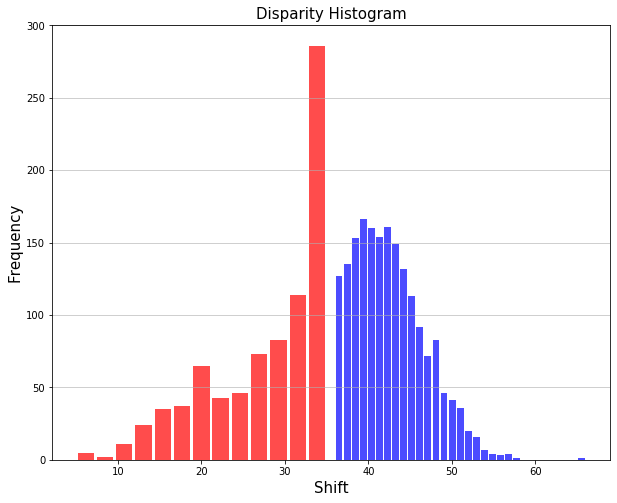

In [62]:
from matplotlib import pyplot as plt
def plot_histogram(clus_1,clus_2):
    plt.figure(figsize=[10,8])
    plt.hist(x=clus_1, bins='auto', color='red',alpha=0.7, rwidth=0.85)
    plt.hist(x=clus_2, bins='auto', color='blue',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Shift',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Disparity Histogram',fontsize=15)
    plt.show();
    
plot_histogram(cluster1,cluster2)